In [1]:
#needs version >= 1.5 for full functionality
import tequila as tq

In [2]:
#Initialize molecule
import tequila as tq
geomstring="O 0.0 0.0 0.0\nO 0.0 0.0 1.207"
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ")
print(molecule)

<class 'tequila.quantumchemistry.psi4_interface.QuantumChemistryPsi4'>
Qubit Encoding
JordanWigner

Parameters
basis_set       : cc-pVDZ         
geometry        : O 0.0 0.0 0.0
O 0.0 0.0 1.207 
description     :                 
multiplicity    : 1               
charge          : 0               
name            : o2              
frozen_core     : True            
n_qubits        : 52              
reference state : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Basis

IntegralManager:
ActiveSpace:
Active Space Data:
active_orbitals : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] 
reference_orbitals : [0, 1, 2, 3, 4, 5, 6, 7] 
active_reference_orbitals : [2, 3, 4, 5, 6, 7] 
frozen_docc     : [1, 0, 0, 0, 0, 1, 0, 0] 
frozen_uocc     : [0, 0, 0, 0, 0, 0, 0, 0] 
Orbitals:
{irrep:AG, idx_irrep:0, idx_total:0, energy:-20.73659

In [3]:
#Molecular Orbitals and Point Groups
molecule.orbitals[3]

OrbitalData(irrep='AG', idx_irrep=2, idx_total=5, idx=3, energy=-0.7336705963236086, occ=None, pair=None)

In [4]:
#Since, the O2 Hamiltonian (52-qubit Hamiltonian) is very large, 
#so let's set the active space and then initialize the Qubit Hamiltonian
import tequila as tq
import numpy
active_orbitals = {"AG":[2,3,4], "B1G":[0]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 193 terms
-143.2508-0.2124Z(0)-0.0689Y(0)Z(1)Y(2)-0.0689X(0)Z(1)X(2)-0.0192Y(0)Z(1)Z(2)Z(3)Y(4)-0.0192X(0)Z(1)Z(2)Z(3)X(4)-0.2124Z(1)-0.0689Y(1)Z(2)Y(3)-0.0689X(1)Z(2)X(3)-0.0192Y(1)Z(2)Z(3)Z(4)Y(5)-0.0192X(1)Z(2)Z(3)Z(4)X(5)-0.8774Z(2)-0.0215Y(2)Z(3)Y(4)-0.0215X(2)Z(3)X(4)-0.8774Z(3)-0.0215Y(3)Z(4)Y(5)-0.0215X(3)Z(4)X(5)-0.9897Z(4)-0.9897Z(5)-1.6921Z(6)-1.6921Z(7)+0.1565Z(0)Z(1)+0.0279Y(0)Y(2)+0.0279X(0)X(2)+0.0133Y(0)Z(2)Z(3)Y(4)+0.0133X(0)Z(2)Z(3)X(4)+0.0279Z(0)Y(1)Z(2)Y(3)+0.0279Z(0)X(1)Z(2)X(3)+0.0182Y(0)X(1)X(2)Y(3)-0.0182Y(0)Y(1)X(2)X(3)-0.0182X(0)X(1)Y(2)Y(3)+0.0182X(0)Y(1)Y(2)X(3)-0.0040Y(0)X(1)X(3)Y(4)-0.0040Y(0)Y(1)Y(3)Y(4)-0.0040X(0)X(1)X(3)X(4)-0.0040X(0)Y(1)Y(3)X(4)+0.0133Z(0)Y(1)Z(2)Z(3)Z(4)Y(5)+0.0133Z(0)X(1)Z(2)Z(3)Z(4)X(5)+0.0040Y(0)X(1)X(2)Z(3)Z(4)Y(5)-0.0040Y(0)Y(1)X(2)Z(3)Z(4)X(5)-0.0040X(0)X(1)Y(2)Z(3)Z(4)Y(5)+0.0040X(0)Y(1)Y(2)Z(3)Z(4)X(5)+0.0096Y(0)X(1)X(4)Y(5)-0.0096Y(0)Y(1)X(4)X(5)-0.0096X(0)X(1)Y(4)Y(5)+0.0096X(0)Y(1)Y(4)X(5)+0.0034Y(0)X(1)X(6

In [1]:
import tequila as tq
threshold = 1.e-6
geomstring="O 0.0 0.0 0.0\nO 0.0 0.0 1.207"
active = {"AG":[2,3,4], "B1G":[0]}
molecule = tq.quantumchemistry.Molecule(geometry=geomstring, basis_set='cc-pVDZ', active_orbitals=active)
H = molecule.make_hamiltonian()

U = molecule.make_upccgsd_ansatz(name="2-UpCCGD")

# define the expectationvalue
E = tq.ExpectationValue(H=H, U=U)

# compute reference energies
mp2 = molecule.compute_energy("mp2")
cisd = molecule.compute_energy("detci", options={"detci__ex_level": 2})
fci = molecule.compute_energy("fci")

# optimize
result = tq.minimize(objective=E, method="BFGS", initial_values=0.0)

print("VQE : {:+2.8}f".format(result.energy))
print("MP2 : {:+2.8}f".format(mp2))
print("CISD: {:+2.8}f".format(cisd))
print("FCI : {:+2.8}f".format(fci))

There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for mp2.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 24 expectationvalues

active variables : 12

E=-149.54302095  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 0.0, (((0, 3),), 'D', (None, 0)): 0.0, (((1, 2),), 'D', (None, 0)): 0.0, (((1, 3),), 'D', (None, 0)): 0.0, (((2, 3),), 'D', (None, 0)): 0.0, (((0, 1),), 'D', (None, 1)): 0.0, (((0, 2),), 'D', (None, 1)): 0.0, (((0, 3),), 'D', (None, 1)): 0.0, (((1, 2),), 'D', (None, 1)): 0.0, (((1, 3),), 'D', (None, 1)): 0.0, (((2, 3),), 'D', (None, 1)): 0.0}  samples= None
E=-149.53459409  angles= {(((0, 1),), 'D', (None, 0)): -0.07294464111328125, (((0, 2),), 'D', (None, 0)): -0.038558959960937

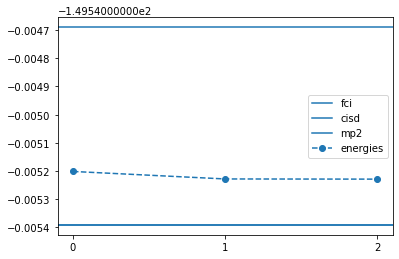

In [2]:
result.history.plot("energies", baselines={"fci":fci, "cisd": cisd, "mp2":mp2}, filename="O2_result_bfgs")